<img src="./images/dsi_13_sg_shaun_project_3_banner.jpg">

# Project 3: Web APIs and Classification
**<font color = blue> Shaun Chua 
<br> (DSI-13) </font>**

---

# Table of Contents: <a id="top"></a>
[**1. Problem Statement**](#1)
<br> [**2. Importing Libraries**](#2)
<br> [**3. Data Collection**](#3)
<br> &emsp; [3.1 Exploring Reddit's API](#3.1)
<br> &emsp; [3.2 Creating a Function to Get Posts](#3.2)
<br> &emsp; [3.3 Data Collection from r/gambling](#3.3)
<br> &emsp; [3.4 Data Collection from r/problemgambling](#3.4)
<br> [**4. Data Cleaning & EDA**](#4)
<br> &emsp; [4.1 Creating a Function to Preview Data](#4.1)
<br> &emsp; [4.2 Reading and Previewing Datasets](#4.2)
<br> &emsp; [4.3 Cleaning the Datasets](#4.3)
<br> &emsp;&emsp;&emsp; [4.3.1 Selecting Columns](#4.3.1)
<br> &emsp;&emsp;&emsp; [4.3.2 Combining Datasets](#4.3.2)
<br> &emsp;&emsp;&emsp; [4.3.3 Dropping Duplicates](#4.3.3)
<br> &emsp;&emsp;&emsp; [4.3.4 Resolving Missing Values for `title`](#4.3.4)
<br> &emsp;&emsp;&emsp; [4.3.5 Resolving Missing Values for `subreddit`](#4.3.5)
<br> &emsp;&emsp;&emsp; [4.3.6 Resolving Missing Values for `selftext`](#4.3.6)
<br> &emsp;&emsp;&emsp; [4.3.7 Mapping `subreddit`](#4.3.7)
<br> &emsp;&emsp;&emsp; [4.3.8 Cleaning with RegEx](#4.3.8)
<br> &emsp;&emsp;&emsp; [4.3.9 Cleaning with Stop Words](#4.3.9)
<br> &emsp;&emsp;&emsp; [4.3.10 Cleaning with Lemmetisation](#4.3.10)
<br> &emsp; [4.4 EDA: Visualisation](#4.4)
<br> &emsp;&emsp;&emsp; [4.4.1 Word Cloud](#4.4.1)
<br> &emsp;&emsp;&emsp; [4.4.2 Barh Plot](#4.4.2)
<br> [**5. Preprocessing and Modelling**](#5)
<br> &emsp; [5.1 Train Test Split](#5.1)
<br> &emsp; [5.2 MultinomialNB](#5.2)
<br> &emsp; [5.3 Logistic Regression](#5.3)
<br> &emsp; [5.4 Model Optimisation](#5.4)
<br> &emsp;&emsp;&emsp; [5.4.1 GridSearchCV](#5.4.1)
<br> &emsp;&emsp;&emsp; [5.4.2 Optimised MultinomialNB](#5.4.2)
<br> &emsp;&emsp;&emsp; [5.4.3 Optimised Logistic Regression](#5.4.3)
<br> &emsp; [5.5 Summary of Classification Metrics](#5.5)
<br> &emsp; [5.6 Fitting the Chosen Model](#5.6)
<br> &emsp; [5.7 Feature Words and Coefficients](#5.7)
<br> &emsp;&emsp;&emsp; [5.7.1 Feature Words](#5.7.1)
<br> &emsp;&emsp;&emsp; [5.7.2 Coefficients](#5.7.2)
<br> &emsp; [5.8 The ROC Curve](#5.8)
<br> [**6. Conclusion and Recommendations**](#6)
<br> [**7. Limitations**](#7)
<br> [**8. Future Directions**](#8)

# 1. Problem Statement <a id="1"></a>

It is evident that problem gambling <a href="https://www.straitstimes.com/singapore/more-seek-help-for-gambling-problems">continues to exist</a> in Singapore, with illegal gambling persisting even <a href="https://www.straitstimes.com/singapore/police-arrest-37-people-seized-more-than-3000-in-illegal-gambling-prostitution-sting">in recent times</a>. 

As the <a href="https://www.ncpg.org.sg/en/Pages/Home.aspx">National Council on problem Gambling</a> (NCG) continues to combat problem gambling, finding a method to distinguish between gambling and problem gambling may prove useful.

To this end, our project aims to develop a model that will assist in identifying individuals heading towards problem gambling, or are already facing problem gambling.

**The goal of this project is two-fold:**
<br> (1) Utilise Reddit's Application Programming Interface (API) to collect posts from **two** subreddits
<br> (2) Utilise Natural Language Processsing (NLP) to train **at least two** models which can be used to classify posts based on which of the two subreddits it came from. 

The two subreddits I will be using are <a href="https://www.reddit.com/r/problemgambling/">**r/problemgambling**</a> and <a href="https://www.reddit.com/r/gambling/">**r/gambling**</a>. 

The **Multinomial Naive Bayes Model** and **Logistic Regression Model** will be used.
<a id="here"></a>

Several classification metrics will be considered, and these include: 
<br> 1) Accuracy (not the final indicator of success)
<br> 2) Sensitivity
<br> 3) Specificity
<br> 4) ROC_AUC Score

**I will most likely focus on sensitivity** as the main criteria, because I am predicting problemgambling. So I would rather correctly predict individuals heading towards/or currently experiencing problemgambling. I will discuss this again at the [summary scores section](#5.4.4) later.

<br> The findings of this project may provide insight which caters to **two main stakeholder groups**. 

First, to the NCPG Management, and second, to the NCPG Data Science Team. 

I believe that the findings of this project, in particular the keywords that tend to distinguish between gambling and problem gambling, will aid in identifiying Singaporeans headed towards, or are currently facing, problem gambling. 

<br> This will be elaborated on more in the [Conclusions and Recommendations](#6) section. 

# 2. Importing Libraries <a id="2"></a>

In [1]:
import requests 
import pandas as pd
import time
import random
import numpy as np
import json
import urllib 
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table 


class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

%matplotlib inline

In [2]:
#!pip install wordcloud

In [3]:
# Starting timer

t0 = time.time()

# 3. Data Collection <a id="3"></a>

Subreddits:
<br> 1) <a href="https://www.reddit.com/r/problemgambling/">**r/problemgambling**</a>
<br> 2) <a href="https://www.reddit.com/r/gambling/">**r/gambling**</a>. 

## 3.1 Exploring Reddit's API <a id="3.1"></a>

In [4]:
# header = {"User-agent": "Mozilla/5.0"}
# I'll be manually typing "user-agent" into "requests.get" because I want to familiarise myself

In [5]:
# Assigning URL of r/problemgambling to "url_problemgambling"

url_problemgambling = "https://www.reddit.com/r/problemgambling.json"

In [6]:
# Getting the response object for r/investing using requests library 

res_problemgambling = requests.get(url_problemgambling, headers={"User-agent":"Mozilla/5.0"})

In [7]:
# Checking to see whether it was successful
# Response code of 200 indicates that it is successful 

res_problemgambling.status_code

200

In [8]:
# I'm just curious to find out what res_problemgambling returns at this point

res_problemgambling

<Response [200]>

In [9]:
# Getting the type ... ok it is a response object, explains the cell above. 

type(res_problemgambling)

requests.models.Response

In [10]:
# As per primer video, applying .json() method to the response object "res_problemgambling" will return a dictionary

res_problemgambling.json()

{'kind': 'Listing',
 'data': {'modhash': '',
  'dist': 26,
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'problemgambling',
     'selftext': 'Please use this thread as an opportunity to speak your mind, check in for the week, and to receive support from and/or provide support to the community.\n\nWe ask that you use the following format:\n\n* Identify/describe yourself however you would like\n* Describe how you have managed the past week with regards to recovery and life in general\n* State if you do or do not welcome feedback on your comment\n\nWe will also welcome inspiring messages of hope, encouragement, motivation, and other forms of positivity.\n\n*Please Note: This is a community support thread exclusive to /r/problemgambling and is no way affiliated with Gamblers Anonymous. This is not a substitute for treatment/therapy.*',
     'author_fullname': 't2_6l4z3',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clic

In [11]:
# Since res_investing.json() gives me a dictionary, I will assign it to "problemgambling_dict"

problemgambling_dict = res_problemgambling.json()

In [12]:
# Having a look at investing_dict

problemgambling_dict

{'kind': 'Listing',
 'data': {'modhash': '',
  'dist': 26,
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'problemgambling',
     'selftext': 'Please use this thread as an opportunity to speak your mind, check in for the week, and to receive support from and/or provide support to the community.\n\nWe ask that you use the following format:\n\n* Identify/describe yourself however you would like\n* Describe how you have managed the past week with regards to recovery and life in general\n* State if you do or do not welcome feedback on your comment\n\nWe will also welcome inspiring messages of hope, encouragement, motivation, and other forms of positivity.\n\n*Please Note: This is a community support thread exclusive to /r/problemgambling and is no way affiliated with Gamblers Anonymous. This is not a substitute for treatment/therapy.*',
     'author_fullname': 't2_6l4z3',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clic

In [13]:
# Zooming in to the keys in problemgambling_dict

problemgambling_dict.keys()

dict_keys(['kind', 'data'])

In [14]:
# Having a look at the values stored in "kind"
# As per primer video, whatever is stored here is not very helpful, probably just telling us it is a listing?

problemgambling_dict["kind"]

'Listing'

In [15]:
# Having a look at the values stored in "data"
# Looks like there are more dictionaries stored within the "data" dictionary itself

problemgambling_dict["data"]

{'modhash': '',
 'dist': 26,
 'children': [{'kind': 't3',
   'data': {'approved_at_utc': None,
    'subreddit': 'problemgambling',
    'selftext': 'Please use this thread as an opportunity to speak your mind, check in for the week, and to receive support from and/or provide support to the community.\n\nWe ask that you use the following format:\n\n* Identify/describe yourself however you would like\n* Describe how you have managed the past week with regards to recovery and life in general\n* State if you do or do not welcome feedback on your comment\n\nWe will also welcome inspiring messages of hope, encouragement, motivation, and other forms of positivity.\n\n*Please Note: This is a community support thread exclusive to /r/problemgambling and is no way affiliated with Gamblers Anonymous. This is not a substitute for treatment/therapy.*',
    'author_fullname': 't2_6l4z3',
    'saved': False,
    'mod_reason_title': None,
    'gilded': 0,
    'clicked': False,
    'title': 'Weekly Commu

In [16]:
# Having a look at the keys in investing_dict["data"]

problemgambling_dict["data"].keys()

dict_keys(['modhash', 'dist', 'children', 'after', 'before'])

In [17]:
# As per primer video, the "children" key contains all posts retrieved, so I'm zooming into that first
# It seems that problemgambling_dict["data]["children"] returns a list of dictionaries 
# In turn, each dictionary seems to be one post, and each dictionary has 2 keys:
# "kind" and "data"

problemgambling_dict["data"]["children"][0].keys()

dict_keys(['kind', 'data'])

In [18]:
# Checking what the "kind" key has for the first post [0] ... not sure what that is, probably a naming convention

problemgambling_dict["data"]["children"][0]["kind"]

't3'

In [19]:
# Checking what the "data" key has for the first post [0] ... this looks like what I need
# It contains the post text in "selftext"

problemgambling_dict["data"]["children"][0]["data"]

{'approved_at_utc': None,
 'subreddit': 'problemgambling',
 'selftext': 'Please use this thread as an opportunity to speak your mind, check in for the week, and to receive support from and/or provide support to the community.\n\nWe ask that you use the following format:\n\n* Identify/describe yourself however you would like\n* Describe how you have managed the past week with regards to recovery and life in general\n* State if you do or do not welcome feedback on your comment\n\nWe will also welcome inspiring messages of hope, encouragement, motivation, and other forms of positivity.\n\n*Please Note: This is a community support thread exclusive to /r/problemgambling and is no way affiliated with Gamblers Anonymous. This is not a substitute for treatment/therapy.*',
 'author_fullname': 't2_6l4z3',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'Weekly Community Support Thread: Monday, March 23, 2020',
 'link_flair_richtext': [],
 'subreddit_name_pr

In [20]:
# Checking for how many posts I got, by looking at how many dictionaries I got
# I got a list of 26 dictionaries, so 26 posts

len(problemgambling_dict["data"]["children"])

26

In [21]:
# As per primer video, if we have a list of dictionaries, we can immediately create a DataFrame out of it
# According to the DF, each "child" has a "data" key and a "kind" key

problemgambling_dict_df = pd.DataFrame(problemgambling_dict["data"]["children"])
problemgambling_dict_df

,kind,data
0,t3,"{'approved_at_utc': None, 'subreddit': 'proble..."
1,t3,"{'approved_at_utc': None, 'subreddit': 'proble..."
2,t3,"{'approved_at_utc': None, 'subreddit': 'proble..."
3,t3,"{'approved_at_utc': None, 'subreddit': 'proble..."
4,t3,"{'approved_at_utc': None, 'subreddit': 'proble..."
5,t3,"{'approved_at_utc': None, 'subreddit': 'proble..."
6,t3,"{'approved_at_utc': None, 'subreddit': 'proble..."
7,t3,"{'approved_at_utc': None, 'subreddit': 'proble..."
8,t3,"{'approved_at_utc': None, 'subreddit': 'proble..."
9,t3,"{'approved_at_utc': None, 'subreddit': 'proble..."


In [22]:
# Having a look at whatever is stored in the "data" for each child
# Visualising it in a DF

pd.DataFrame(p["data"] for p in problemgambling_dict["data"]["children"])

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video
0,None,problemgambling,Please use this thread as an opportunity to sp...,t2_6l4z3,False,None,0,False,"Weekly Community Support Thread: Monday, March...",[],...,None,/r/problemgambling/comments/fnlkgg/weekly_comm...,None,True,https://www.reddit.com/r/problemgambling/comme...,5488,1.584976e+09,0,None,False
1,None,problemgambling,,t2_21i03lmw,False,None,0,False,Togetherwearebetter 💗,[],...,dark,/r/problemgambling/comments/fre2cl/togetherwea...,None,False,https://www.reddit.com/r/problemgambling/comme...,5488,1.585519e+09,0,None,False
2,None,problemgambling,This has been so odd. My success at days clean...,t2_5qznp3wn,False,None,0,False,Day 12,[],...,dark,/r/problemgambling/comments/frcptk/day_12/,None,False,https://www.reddit.com/r/problemgambling/comme...,5488,1.585514e+09,0,None,False
3,None,problemgambling,3 weeks! Feelin good.,t2_4zu6isec,False,None,0,False,Day 2️⃣1️⃣,[],...,dark,/r/problemgambling/comments/fr9pha/day_21/,None,False,https://www.reddit.com/r/problemgambling/comme...,5488,1.585503e+09,0,None,False
4,None,problemgambling,,t2_21i03lmw,False,None,0,False,DAY 5️⃣8️⃣7️⃣,[],...,dark,/r/problemgambling/comments/fre1w4/day_587/,None,False,https://www.reddit.com/r/problemgambling/comme...,5488,1.585519e+09,0,None,False
5,None,problemgambling,Last few days I’ve been really fighting the ur...,t2_5fujclu1,False,None,0,False,Day 6,[],...,None,/r/problemgambling/comments/fre1bq/day_6/,None,False,https://www.reddit.com/r/problemgambling/comme...,5488,1.585519e+09,0,None,False
6,None,problemgambling,,t2_chf30xx,False,None,0,False,Day 3️⃣,[],...,None,/r/problemgambling/comments/fraiqw/day_3/,None,False,https://www.reddit.com/r/problemgambling/comme...,5488,1.585506e+09,0,None,False
7,None,problemgambling,Anyone else's problem gambling result in them ...,t2_4um17kc3,False,None,0,False,Relationship Issues,[],...,None,/r/problemgambling/comments/frjl2b/relationshi...,None,False,https://www.reddit.com/r/problemgambling/comme...,5488,1.585540e+09,0,None,False
8,None,problemgambling,Today marks 91 days. (I believe it’s my longes...,t2_2qds7o41,False,None,0,False,91 days,[],...,None,/r/problemgambling/comments/frji9u/91_days/,None,False,https://www.reddit.com/r/problemgambling/comme...,5488,1.585539e+09,0,None,False
9,None,problemgambling,"while I did relapse today, I have taken the ad...",t2_62eaom2s,False,None,0,False,[Day 0] Thank you reddit for the advice. Today...,[],...,None,/r/problemgambling/comments/fr8cnh/day_0_thank...,None,False,https://www.reddit.com/r/problemgambling/comme...,5488,1.585499e+09,0,None,False


In [23]:
# Looking at the first row, the "data"

problemgambling_dict["data"]["children"][0]["data"]

{'approved_at_utc': None,
 'subreddit': 'problemgambling',
 'selftext': 'Please use this thread as an opportunity to speak your mind, check in for the week, and to receive support from and/or provide support to the community.\n\nWe ask that you use the following format:\n\n* Identify/describe yourself however you would like\n* Describe how you have managed the past week with regards to recovery and life in general\n* State if you do or do not welcome feedback on your comment\n\nWe will also welcome inspiring messages of hope, encouragement, motivation, and other forms of positivity.\n\n*Please Note: This is a community support thread exclusive to /r/problemgambling and is no way affiliated with Gamblers Anonymous. This is not a substitute for treatment/therapy.*',
 'author_fullname': 't2_6l4z3',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'Weekly Community Support Thread: Monday, March 23, 2020',
 'link_flair_richtext': [],
 'subreddit_name_pr

In [24]:
# As per primer video, creating a list to contain all the data for each post
problemgambling_posts = [post["data"] for post in problemgambling_dict["data"]["children"]]
problemgambling_posts

[{'approved_at_utc': None,
  'subreddit': 'problemgambling',
  'selftext': 'Please use this thread as an opportunity to speak your mind, check in for the week, and to receive support from and/or provide support to the community.\n\nWe ask that you use the following format:\n\n* Identify/describe yourself however you would like\n* Describe how you have managed the past week with regards to recovery and life in general\n* State if you do or do not welcome feedback on your comment\n\nWe will also welcome inspiring messages of hope, encouragement, motivation, and other forms of positivity.\n\n*Please Note: This is a community support thread exclusive to /r/problemgambling and is no way affiliated with Gamblers Anonymous. This is not a substitute for treatment/therapy.*',
  'author_fullname': 't2_6l4z3',
  'saved': False,
  'mod_reason_title': None,
  'gilded': 0,
  'clicked': False,
  'title': 'Weekly Community Support Thread: Monday, March 23, 2020',
  'link_flair_richtext': [],
  'subred

In [25]:
# Getting the id of the last post I got
problemgambling_dict["data"]["after"]

't3_fqg0gz'

In [26]:
# THIS IS NOT PART OF THE PROJECT, I WAS JUST TESTING IT OUT BUT LEAVING IT HERE FOR LEARNING PURPOSES

# As per primer reddit-api notebook, attempting to scrap from r/investing to try it out

#url_investing = "https://www.reddit.com/r/investing.json"
#investing_posts = []
#after = None

#for i in range(2):
#    if after == None:
#        current_url = url_investing
#    else:
#        current_url = url_investing + "?after=" + after
#    print(current_url)
#    res_investing = requests.get(current_url, headers={"user-agent": "Mozilla/5.0"})
    
#    if res_investing.status_code != 200:
#        print("Status error", res_investing.status_code)
#         break
    
#    current_dict = res_investing.json()
#    current_posts = [post["data"] for post in current_dict["data"]["children"]]
#    investing_posts.extend(current_posts)
#    after = current_dict['data']['after']
    
#    if i > 0:
        #prev_posts = pd.read_csv('investing.csv')
#        pd.DataFrame(investing_posts).to_csv('./datasets/investing.csv', index = False)
#        current_df = pd.DataFrame()
        
#    else:
#        pd.DataFrame(investing_posts).to_csv('./datasets/investing.csv', index = False)

    # generate a random sleep duration to look more 'natural'
#    sleep_duration = random.randint(5,20)
#    print(f"Sleeping for {sleep_duration}s before scraping again")
#    time.sleep(sleep_duration)

# notetoself: comment out entire cell
# https://stackoverflow.com/questions/32444840/jupyter-how-to-comment-out-cells

In [27]:
# I thought this was from the primer video, but can't seem to get it to work oh well... 

# len(set[post["data"]["name"] for post in investing_posts])

## 3.2 Creating a Function to Get Posts <a id="3.2"></a>

In [28]:
# Adapted from primer video and reddit api notebook

def get_them_posts(n, url, subreddit):
    after = None
    subreddit_df = pd.DataFrame()
    for i in range(n):
        if after == None:
            current_url = url
        else:
            current_url = url + "?after=" + after
        print(current_url)
        res = requests.get(current_url, headers={"user-agent": "Mozilla/5.0"})

        if res.status_code != 200:
            print("Status error", res.status_code)
            break

        current_dict = res.json()
        current_posts = [post["data"] for post in current_dict["data"]["children"]]
        
        # As per primer video, "after" stores the name of the last post scraped for the loop
        # Getting it so we can use it to find the next page of posts
        after = current_dict['data']['after']

        # Saving to a csv AND appending to it each time with mode="a"
        pd.DataFrame(current_posts).to_csv(f'./others/{subreddit}.csv', index=False, mode="a")
            
        # generate a random sleep duration to look more 'natural'
        sleep_duration = random.randint(5,45)
        print(f"Sleeping for {sleep_duration}s before scraping again")
        time.sleep(sleep_duration)

        # Upon discussion with the group, I learnt that after a certain amount of posts, reddit will return 
        # an after = null (I'm not sure why, but maybe its some limit thing)
        # Eitherway, I learnt that its worth breaking the loop here
        if after == None:
            break

## 3.3 Data Collection from r/gambling <a id="3.3"></a>

In [29]:
url_gambling = "https://www.reddit.com/r/gambling.json"

In [30]:
res_gambling = requests.get(url_gambling, headers={"user-agent": "Mozilla/5.0"})

In [31]:
res_gambling.status_code

200

In [32]:
# I already ran this, so commenting the code and saving your time cos my sleep is long

# get_them_posts(40, url_gambling, "gambling")

## 3.4 Data Collection from r/problemgambling <a id="3.4"></a>

In [33]:
# This is actually above but I'm retyping it here for readability

url_problemgambling = "https://www.reddit.com/r/problemgambling.json"

In [34]:
# This is actually above but I'm retyping it here for readability

res_problemgambling = requests.get(url_problemgambling, headers={"User-agent":"Mozilla/5.0"})

In [35]:
# This is actually above but I'm retyping it here for readability

res_problemgambling.status_code

200

In [36]:
# Same thing, I already ran this and saved the CSV file

# get_them_posts(40, url_problemgambling, "problemgambling")

<br> [Back to Content Page](#top)

# 4. Data Cleaning and EDA <a id="4"></a>

## 4.1 Creating a Function to Preview Data <a id="4.1"></a>

In [37]:
def preview(dataframe):
    dataframe_name = [x for x in globals() if globals()[x] is dataframe][0]
    print("{} has shape: {}.".format(dataframe_name, dataframe.shape))
    
    print("\n")
    print("These are the top 5 rows of {}:".format(dataframe_name))
    display(dataframe.head())

    print("\n")
    print("These are the bottom 5 rows of {}:".format(dataframe_name))
    display(dataframe.tail())
    
    print("\n")
    nulls = dataframe.isnull().sum()
    total_nulls = dataframe.isnull().sum().sum()
    if total_nulls > 0:
        print("{} has a total {} of nulls.".format(dataframe_name, total_nulls))
        print("\n")
        print("The columns in {} with nulls are: {}".format(dataframe_name, list(nulls[nulls > 0].index))) 
      
        print("\n")
        print("The variables with missing value counts in {} are:".format(dataframe_name))
        display(nulls)

        print("\n")
        print("The top 5 variables in {} with the highest percentage of missing values are:".format(dataframe_name))
        display(dataframe.isnull().mean().sort_values(ascending=False)[:5])

    else:
        print("{} does not contain nulls".format(dataframe_name))
        

## 4.2 Reading and Previewing Datasets <a id="4.2"></a>

##### Reading gambling and problemgambling datasets saved from [3.3](#3.3) and [3.4](#3.4)

In [38]:
gambling_df = pd.read_csv("./datasets/gambling.csv")
problemgambling_df = pd.read_csv("./datasets/problemgambling.csv")

##### Using `preview` function to preview gambling and problemgambling

I'm lowkey proud of this function I made, its not fantastic but ... 

<img src="./images/dsi_13_sg_shaun_project_3_its_something.jpg" width="300" height="240" align="left"/>

In [39]:
preview(gambling_df)
preview(problemgambling_df)

gambling_df has shape: (479, 106).


These are the top 5 rows of gambling_df:


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,subreddit_subscribers,created_utc,num_crossposts,media,is_video,post_hint,preview,Unnamed: 103,Unnamed: 104,Unnamed: 105
0,NaN,gambling,Please use this thread to discuss your proudes...,t2_6l4z3,FALSE,NaN,0,FALSE,Monthly Gambling Discussion – Tell us about yo...,[],...,25976,1583075665,0,NaN,FALSE,NaN,NaN,NaN,NaN,NaN
1,NaN,gambling,NaN,t2_2su98eaq,FALSE,NaN,0,FALSE,Same slot I hit a jackpot on last week! MInnes...,[],...,25976,1583710041,0,NaN,FALSE,image,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN
2,NaN,gambling,Have you had more frequent or larger wins on B...,t2_p0jhq,FALSE,NaN,0,FALSE,Which bet have you had most success on Buffalo...,[],...,25976,1583695477,0,NaN,FALSE,NaN,NaN,NaN,NaN,NaN
3,NaN,gambling,NaN,t2_ekhj3,FALSE,NaN,0,FALSE,Killing time before my girlfriend got outta wo...,[],...,25976,1583634365,0,NaN,FALSE,image,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN
4,NaN,gambling,Take an amount per paycheck? Do side work stri...,t2_4t6chhnz,FALSE,NaN,0,FALSE,How do you guys fund your gambling?,[],...,25976,1583714838,0,NaN,FALSE,NaN,NaN,NaN,NaN,NaN




These are the bottom 5 rows of gambling_df:


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,subreddit_subscribers,created_utc,num_crossposts,media,is_video,post_hint,preview,Unnamed: 103,Unnamed: 104,Unnamed: 105
474,NaN,gambling,NaN,t2_42t1rtcn,FALSE,NaN,0,FALSE,14th birthday cake,[],...,FALSE,https://i.redd.it/lxvkq3ljty041.jpg,25976,1574745564,0,NaN,FALSE,NaN,NaN,NaN
475,NaN,gambling,I was listening to Freakonomics podcast a few ...,t2_a37yx,FALSE,NaN,0,FALSE,Heavy horse favorites to show,[],...,FALSE,https://www.reddit.com/r/gambling/comments/e28...,25976,1574819625,0,NaN,FALSE,NaN,NaN,NaN
476,NaN,gambling,NaN,t2_4651y256,FALSE,NaN,0,FALSE,Another parlay,[],...,FALSE,https://i.redd.it/mqetxbhh4y041.jpg,25976,1574737135,0,NaN,FALSE,NaN,NaN,NaN
477,NaN,gambling,NaN,t2_3xcggr94,FALSE,NaN,0,FALSE,Taruhan Slot Online Terpercaya,[],...,FALSE,http://ttgslot.com/taruhan-slot-online/,25976,1574759484,0,NaN,FALSE,NaN,NaN,NaN
478,NaN,gambling,"Hi, all! Ive always had very positive experien...",t2_12bf07,FALSE,NaN,0,FALSE,Are casino dealers meant to confuse you,[],...,FALSE,https://www.reddit.com/r/gambling/comments/e1n...,25976,1574720749,0,NaN,FALSE,NaN,NaN,NaN




gambling_df has a total 16243 of nulls.


The columns in gambling_df with nulls are: ['approved_at_utc', 'selftext', 'author_fullname', 'mod_reason_title', 'link_flair_css_class', 'thumbnail_height', 'author_flair_background_color', 'thumbnail_width', 'author_flair_template_id', 'secure_media', 'category', 'link_flair_text', 'approved_by', 'author_premium', 'author_flair_css_class', 'author_flair_richtext', 'content_categories', 'is_self', 'mod_note', 'created', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'selftext_html', 'likes', 'suggested_sort', 'banned_at_utc', 'view_count', 'archived', 'awarders', 'author_flair_text', 'removed_by', 'num_reports', 'distinguished', 'subreddit_id', 'mod_reason_by', 'removal_reason', 'link_flair_background_color', 'id', 'is_robot_indexable', 'report_reasons', 'discussion_type', 'send_replies', 'author_patreon_flair', 'author_flair_text_color', 'permalink', 'parent_whitelist_status', 'media', 'post_hint', 'preview', 'Unnamed: 1

approved_at_utc    462
subreddit            0
selftext           219
author_fullname      4
saved                0
                  ... 
post_hint          354
preview            144
Unnamed: 103       447
Unnamed: 104       460
Unnamed: 105       477
Length: 106, dtype: int64



The top 5 variables in gambling_df with the highest percentage of missing values are:


Unnamed: 105                     0.995825
discussion_type                  0.964509
mod_reason_title                 0.964509
link_flair_css_class             0.964509
author_flair_background_color    0.964509
dtype: float64

problemgambling_df has shape: (1096, 105).


These are the top 5 rows of problemgambling_df:


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,link_flair_template_id,Unnamed: 102,Unnamed: 103,Unnamed: 104
0,NaN,problemgambling,Please use this thread as an opportunity to sp...,t2_6l4z3,FALSE,NaN,0,FALSE,"Weekly Community Support Thread: Monday, Febru...",[],...,https://www.reddit.com/r/problemgambling/comme...,5272,1582557154,0,NaN,FALSE,NaN,NaN,NaN,NaN
1,NaN,problemgambling,"My story is, i would say i am/was hooked by Ga...",t2_4kzbwemg,FALSE,NaN,0,FALSE,"Even if this sounds ridiculous, i just want to...",[],...,https://www.reddit.com/r/problemgambling/comme...,5272,1583731346,0,NaN,FALSE,NaN,NaN,NaN,NaN
2,NaN,problemgambling,This is my first post ever on reddit so cut me...,t2_48wvz5g0,FALSE,NaN,0,FALSE,Please Help Me - I don't know how to fix my life,[],...,https://www.reddit.com/r/problemgambling/comme...,5272,1583735275,0,NaN,FALSE,NaN,NaN,NaN,NaN
3,NaN,problemgambling,"Spending more time with my family , reading va...",t2_4lj2lfw0,FALSE,NaN,0,FALSE,Day 12,[],...,https://www.reddit.com/r/problemgambling/comme...,5272,1583717565,0,NaN,FALSE,NaN,NaN,NaN,NaN
4,NaN,problemgambling,"I see it as a drug, which when you don't take(...",t2_587qgqs7,FALSE,NaN,0,FALSE,How to stay positive and motivated when not ga...,[],...,https://www.reddit.com/r/problemgambling/comme...,5272,1583713003,0,NaN,FALSE,NaN,NaN,NaN,NaN




These are the bottom 5 rows of problemgambling_df:


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,link_flair_template_id,Unnamed: 102,Unnamed: 103,Unnamed: 104
1091,NaN,problemgambling,NaN,t2_5ufyt,FALSE,NaN,0,FALSE,Day 1,[],...,https://www.reddit.com/r/problemgambling/comme...,5272,1579449800,0,NaN,FALSE,NaN,NaN,NaN,NaN
1092,NaN,problemgambling,NaN,t2_glw6u,FALSE,NaN,0,FALSE,Day 51,[],...,https://www.reddit.com/r/problemgambling/comme...,5272,1579440472,0,NaN,FALSE,NaN,NaN,NaN,NaN
1093,NaN,problemgambling,&amp;#x200B;\n\nhttps://preview.redd.it/kvqpi6...,t2_3j2dvgku,FALSE,NaN,0,FALSE,Contentment,[],...,https://www.reddit.com/r/problemgambling/comme...,5272,1579457134,0,NaN,FALSE,NaN,NaN,NaN,"{'kvqpi6pbzrb41': {'status': 'valid', 'e': 'Im..."
1094,NaN,problemgambling,NaN,t2_4e8argje,FALSE,NaN,0,FALSE,Day 6️⃣7️⃣,[],...,https://www.reddit.com/r/problemgambling/comme...,5272,1579433203,0,NaN,FALSE,NaN,NaN,NaN,NaN
1095,NaN,problemgambling,Tomorrow I finally get my paid chec/salary/wag...,t2_g8fgq7u,FALSE,NaN,0,FALSE,3 weeks living of 50 euros lol,[],...,https://www.reddit.com/r/problemgambling/comme...,5272,1579453404,0,NaN,FALSE,NaN,NaN,NaN,NaN




problemgambling_df has a total 44410 of nulls.


The columns in problemgambling_df with nulls are: ['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'thumbnail_height', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'thumbnail_width', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live

approved_at_utc           1027
subreddit                   46
selftext                   399
author_fullname             58
saved                       53
                          ... 
is_video                    85
link_flair_template_id     981
Unnamed: 102              1034
Unnamed: 103              1057
Unnamed: 104              1094
Length: 105, dtype: int64



The top 5 variables in problemgambling_df with the highest percentage of missing values are:


Unnamed: 104          0.998175
content_categories    0.965328
view_count            0.965328
removal_reason        0.965328
banned_at_utc         0.965328
dtype: float64

## 4.3 Cleaning the Datasets <a id="4.3"></a>

#### 4.3.1 Selecting Columns <a id="4.3.1"></a>

In [40]:
# Upon discussion with the group, we feel that the relevant columns are: (1) subreddit, (2) selftext, and (3) title
# These columns contain key information that will help address the problem statement

gambling_df = gambling_df[["subreddit", "selftext", "title"]]
problemgambling_df = problemgambling_df[["subreddit", "selftext", "title"]]

#gambling.fillna(" ", inplace=True)
#gambling["posts"] = gambling["selftext"] + gambling["title"]
#gambling[["subreddit", "posts"]]

#### 4.3.2 Combining Datasets <a id="4.3.2"></a>

In [41]:
# Learnt my lesson in project 2, I'm combining them right away. 

combined_df = pd.concat([problemgambling_df, gambling_df]).reset_index(drop=True)
combined_df

,subreddit,selftext,title
0,problemgambling,Please use this thread as an opportunity to sp...,"Weekly Community Support Thread: Monday, Febru..."
1,problemgambling,"My story is, i would say i am/was hooked by Ga...","Even if this sounds ridiculous, i just want to..."
2,problemgambling,This is my first post ever on reddit so cut me...,Please Help Me - I don't know how to fix my life
3,problemgambling,"Spending more time with my family , reading va...",Day 12
4,problemgambling,"I see it as a drug, which when you don't take(...",How to stay positive and motivated when not ga...
...,...,...,...
1570,gambling,NaN,14th birthday cake
1571,gambling,I was listening to Freakonomics podcast a few ...,Heavy horse favorites to show
1572,gambling,NaN,Another parlay
1573,gambling,NaN,Taruhan Slot Online Terpercaya


In [42]:
# Is there a difference if I use the following to concat? Group mate used it, can't seem to 
# see a difference

#combined_df = problemgambling_df.append(gambling_df).reset_index(drop=True)

In [43]:
# Previewing combined_df

preview(combined_df)

_ has shape: (1575, 3).


These are the top 5 rows of _:


,subreddit,selftext,title
0,problemgambling,Please use this thread as an opportunity to sp...,"Weekly Community Support Thread: Monday, Febru..."
1,problemgambling,"My story is, i would say i am/was hooked by Ga...","Even if this sounds ridiculous, i just want to..."
2,problemgambling,This is my first post ever on reddit so cut me...,Please Help Me - I don't know how to fix my life
3,problemgambling,"Spending more time with my family , reading va...",Day 12
4,problemgambling,"I see it as a drug, which when you don't take(...",How to stay positive and motivated when not ga...




These are the bottom 5 rows of _:


,subreddit,selftext,title
1570,gambling,NaN,14th birthday cake
1571,gambling,I was listening to Freakonomics podcast a few ...,Heavy horse favorites to show
1572,gambling,NaN,Another parlay
1573,gambling,NaN,Taruhan Slot Online Terpercaya
1574,gambling,"Hi, all! Ive always had very positive experien...",Are casino dealers meant to confuse you




_ has a total 718 of nulls.


The columns in _ with nulls are: ['subreddit', 'selftext', 'title']


The variables with missing value counts in _ are:


subreddit     46
selftext     618
title         54
dtype: int64



The top 5 variables in _ with the highest percentage of missing values are:


selftext     0.392381
title        0.034286
subreddit    0.029206
dtype: float64

In [44]:
#combined_df["subreddit"]

##### <font color = blue> Shaun: </font>

It looks like there are some nulls for subreddit, selftext, and titles. 
<br> For self-text and titles, it could be the case where some redditors create posts without titles, or vice versa. 
<br> For subreddits, I have no idea why there would be nulls. 

But first things first, let's **check for duplicates and drop them**.

EDIT: How come the dataframe name doesn't show using my function T.T, it worked for everything else.

#### 4.3.3 Dropping Duplicates in combined_df <a id="4.3.3"></a>

In [45]:
# Dropping duplicates and checking for remaining null values

combined_df.drop_duplicates(inplace=True)
combined_df.isnull().sum()

subreddit      2
selftext     518
title          9
dtype: int64

##### <font color = blue> Shaun: </font>

Alright, with the duplicates gone, I'll investigate further. 

The first thing I want to know is how on earth you can post something without a title. I'm no redditor, but it seems to be mandatory.  

So lets take a look at the rows with NaNs for `title`.

In [46]:
# Taking a look at rows with NaN for "title"

combined_df[combined_df["title"].isnull()]

,subreddit,selftext,title
310,problemgambling,My name is Mark and I am a compulsive gambler....,NaN
312,NaN,NaN,NaN
317,people go in and out of your life. Don't miss...,NaN,NaN
319,I guess gambling is the puffer fish in this c...,I was transfixed by the world of online gambling,NaN
321,you are energy.*,NaN,NaN
338,I want to become a better Dad and I want to i...,NaN,NaN
340,either you want to do everything it takes to ...,or you don’t.”&lt;/em&gt;&lt;/p&gt;,NaN
348,people go in and out of your life. Don&amp;#3...,NaN,NaN
352,you are energy.&lt;/em&gt;&lt;/p&gt;,NaN,NaN


##### <font color = blue> Shaun: </font>

I'm at a loss for words here. I meticulously watched the <a href="https://youtu.be/5Y3ZE26Ciuk
">Primer Video</a> and looked through the Reddit API lab, and I think I did most things right. 

I can't explain this peculiar occurrence. My guess is that somehow during the scrapping/saving to csv, something must have gone wrong. But either way, I think a pragmatic fix is to drop these 9 rows of data. 

Logically, it doesn't make sense that a subreddit takes the value of a post anyway. At this juncture, I'm also unsure how to tell which subreddit these supposed posts came from. Therefore, in keeping with the principle of parsimony, I will drop these rows.

#### 4.3.4 Resolving Missing Values for `title` <a id="4.3.4"></a>

In [47]:
# Checking again how many nulls for title

combined_df["title"].isnull().sum()

9

In [48]:
# Dropping rows with "NaN" for "title"
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

combined_df.dropna(subset=["title"], axis=0, inplace=True)

In [49]:
# Checking to see that the 9 rows were dropped ... yes they were

combined_df["title"].isnull().sum()

0

In [50]:
# Checking to see remaining nulls in combined_df

combined_df.isnull().sum()

subreddit      1
selftext     512
title          0
dtype: int64

##### <font color = blue> Shaun: </font>

The problematic `NaN`s for `title` are now removed. I will address the `NaN` for `subreddit`.

Again, I'm not sure why subreddit has a `NaN`. It is supposed to either be **problemgambling** or **gambling**, but perhaps it was corrupted in part due to how Reddit's API scraps posts.

Either way, it's not possible to tell which subreddit it came from at this juncture. Actually maybe it is, but I figured it is beyond the scope of Project 3. 

Hence, I will drop the the row with `NaN` for `subreddit`.


#### 4.3.5 Resolving Missing Values for `subreddit`<a id="4.3.5"></a>

In [51]:
# Checking again how many nulls for subreddit

combined_df["subreddit"].isnull().sum()

1

In [52]:
combined_df.dropna(subset=["subreddit"], axis=0, inplace=True)

In [53]:
# Checking to see that the 1 rows is dropped ... yes they were

combined_df["subreddit"].isnull().sum()

0

In [54]:
# Checking to see remaining nulls in combined_df

combined_df.isnull().sum()

subreddit      0
selftext     511
title          0
dtype: int64

##### <font color = blue> Shaun: </font>

With the post without a subreddit now removed, I will address the final problem, `NaN`s for `selftext`.

I can guess why there are `NaN`s in `selftext`. Perhaps some redditors chose to include a title without text, and maybe include a picture. 

To address the rows with nulls for `selftext`, I will combine `selftext` and `title` for those rows.

The logic is intuititve, the content of the post should serve to complement the title of the post. At least on average. 


#### 4.3.6 Resolving Missing Values for `selftext` <a id="4.3.6"></a>

In [55]:
# Checking how many nulls for selftext

combined_df["selftext"].isnull().sum()

511

In [56]:
# Ran into errors when I tried to add a Nan with a Str, notetoself: you can't do that
# Thus, filling all nulls with an empty space, apparently we CAN add empty spaces to Str

combined_df["selftext"].fillna("",inplace=True)

In [57]:
# Creating a new column "posts" that will host combined title and selftext
# Since I will tokenize later, I don't think it matters whether there is lexical sense after combining

combined_df["posts"] = combined_df["title"] + combined_df["selftext"]

In [58]:
# Of course, after combining I will drop the original columns of selftext and title

combined_df.drop(["selftext", "title"], axis=1, inplace=True)

In [59]:
# Checking combined_df to see if "posts" column was added, and "selftext" & "title" rows dropped 
combined_df

,subreddit,posts
0,problemgambling,"Weekly Community Support Thread: Monday, Febru..."
1,problemgambling,"Even if this sounds ridiculous, i just want to..."
2,problemgambling,Please Help Me - I don't know how to fix my li...
3,problemgambling,"Day 12Spending more time with my family , read..."
4,problemgambling,How to stay positive and motivated when not ga...
...,...,...
1570,gambling,14th birthday cake
1571,gambling,Heavy horse favorites to showI was listening t...
1572,gambling,Another parlay
1573,gambling,Taruhan Slot Online Terpercaya


In [60]:
# Checking to see if all nulls have been resolved for combined_df .. yes they have

combined_df.isnull().sum()

subreddit    0
posts        0
dtype: int64

In [61]:
# Another look at combined_df
preview(combined_df)

__ has shape: (1400, 2).


These are the top 5 rows of __:


,subreddit,posts
0,problemgambling,"Weekly Community Support Thread: Monday, Febru..."
1,problemgambling,"Even if this sounds ridiculous, i just want to..."
2,problemgambling,Please Help Me - I don't know how to fix my li...
3,problemgambling,"Day 12Spending more time with my family , read..."
4,problemgambling,How to stay positive and motivated when not ga...




These are the bottom 5 rows of __:


,subreddit,posts
1570,gambling,14th birthday cake
1571,gambling,Heavy horse favorites to showI was listening t...
1572,gambling,Another parlay
1573,gambling,Taruhan Slot Online Terpercaya
1574,gambling,"Are casino dealers meant to confuse youHi, all..."




__ does not contain nulls


##### <font color = blue> Shaun: </font>

With the missing values accounted for, the last thing I'm going to do is to map the subreddits:
<br> 1 for `problemgambling`
<br> 0 for `gambling` 

#### 4.3.7 Mapping `subreddit` <a id="4.3.7"></a>

In [62]:
# This was what I initially did, but ran into a problem where subreddits were mapped to floats not ints
# Commented it out for my own reference in future, and also if you want to see it

#combined_df.loc[:,"subreddit"] = combined_df['subreddit'].map({"problemgambling":1, "gambling":0})
#combined_df

##### <font color = blue> Shaun: </font>

For some reason, the subreddits were mapped to a float instead of an integer on my first run of mapping (I commented the code out above). 

I'm going to investigate why this is so. 

In [63]:
# There are no NaNs in "subreddit", but maybe there is something apart from
# "problemgambling" and "gambling"
# Checking to see unique values

combined_df["subreddit"].unique()

array(['problemgambling', 'subreddit',
       ' my budget going forward and my closest G.A. meeting',
       ' so instead I am going to list what people have done for me or how they have made me feel and as the name suggests',
       't2_3j2dvgku', ' yeah I cheated a little', 'gambling'],
      dtype=object)

#### <font color = blue> Shaun: </font>

Ok so this is probably the issue. I have other values apart from `problemgambling` and `gambling` within my `subreddit` column. 

Again, I have no idea how these got into the subreddit column, probably something to do with the process of API scrapping or saving to csv. 

Eitherway, these strings do not tell me beyond a reasonable doubt which subreddits they originated from. Therefore, going forward, I will only take columns containing `problemgambling` and `gambling` for the `subreddit` column. 

In [64]:
#((combined_df["subreddit"] == "problemgambling") |(combined_df["subreddit"] == "gambling").sum()

In [65]:
# Learnt the hard way that there is a difference between "or" and pipe ("|") 
# We need to use pipe for multiple boolean conditions
# https://www.dunderdata.com/blog/selecting-subsets-of-data-in-pandas-part-2
# Anyway, taking only rows with "problemgambling" or "gambling" for the "subreddit" column

combined_df = combined_df[(combined_df["subreddit"] == "problemgambling") | (combined_df["subreddit"] == "gambling")]

In [66]:
# Checking to see what are my unique values before mapping again

combined_df["subreddit"].unique()

array(['problemgambling', 'gambling'], dtype=object)

In [67]:
# Mapping with the cleaned "subreddit" column

combined_df.loc[:,"subreddit"] = combined_df["subreddit"].map({"problemgambling":1, "gambling":0})
combined_df

C:\Users\Shaun\anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,subreddit,posts
0,1,"Weekly Community Support Thread: Monday, Febru..."
1,1,"Even if this sounds ridiculous, i just want to..."
2,1,Please Help Me - I don't know how to fix my li...
3,1,"Day 12Spending more time with my family , read..."
4,1,How to stay positive and motivated when not ga...
...,...,...
1570,0,14th birthday cake
1571,0,Heavy horse favorites to showI was listening t...
1572,0,Another parlay
1573,0,Taruhan Slot Online Terpercaya


In [68]:
# Checking unique values for "subreddit" column

combined_df["subreddit"].unique()

array([1, 0], dtype=int64)

In [69]:
# Checking combined_df one final time

preview(combined_df)

__ has shape: (1395, 2).


These are the top 5 rows of __:


,subreddit,posts
0,1,"Weekly Community Support Thread: Monday, Febru..."
1,1,"Even if this sounds ridiculous, i just want to..."
2,1,Please Help Me - I don't know how to fix my li...
3,1,"Day 12Spending more time with my family , read..."
4,1,How to stay positive and motivated when not ga...




These are the bottom 5 rows of __:


,subreddit,posts
1570,0,14th birthday cake
1571,0,Heavy horse favorites to showI was listening t...
1572,0,Another parlay
1573,0,Taruhan Slot Online Terpercaya
1574,0,"Are casino dealers meant to confuse youHi, all..."




__ does not contain nulls


#### 4.3.8 Cleaning with RegEx <a id="4.3.8"></a>

In [70]:
# Defining a function do help me do it forever
# Referencing Lesson 5.05

def regex_cleaner(post):
    # Remove HTML tags and URLs from post
    post = re.sub(r"<.*?>", "", post)
    post = re.sub(r"^https?:\/\/.*[\r\n]*","", post)
    
    # If it is not a word character or space, remove it (punctuations) can also consider: [^a-zA-Z]
    post = re.sub(r"[^\w\s]","", post)
    
    # Remove spaces and lower case
    post = post.strip().lower()

    # Split on spaces or anything not a word character
    tokenised_post = re.split("\W+", post) #W+ --> word chars and dashes permitted
    
    return tokenised_post

In [71]:
combined_df["posts_tokenised"] = combined_df["posts"].apply(lambda post: regex_cleaner(post))
combined_df = combined_df[["subreddit", "posts","posts_tokenised"]]

C:\Users\Shaun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
# Looking at the new DF

combined_df.head()

,subreddit,posts,posts_tokenised
0,1,"Weekly Community Support Thread: Monday, Febru...","[weekly, community, support, thread, monday, f..."
1,1,"Even if this sounds ridiculous, i just want to...","[even, if, this, sounds, ridiculous, i, just, ..."
2,1,Please Help Me - I don't know how to fix my li...,"[please, help, me, i, dont, know, how, to, fix..."
3,1,"Day 12Spending more time with my family , read...","[day, 12spending, more, time, with, my, family..."
4,1,How to stay positive and motivated when not ga...,"[how, to, stay, positive, and, motivated, when..."


#### 4.3.9 Cleaning with Stop Words <a id="4.3.9"></a>

In [73]:
# Referencing lesson 5.05

def stopwords_cleaner(post):
    stopwords_eng = stopwords.words("english") 
        
    post = [word for word in post if word not in stopwords_eng]
    
    return post

In [74]:
combined_df["posts_tokenised_stopped"] = combined_df["posts_tokenised"].apply(lambda post: stopwords_cleaner(post))
combined_df = combined_df[["subreddit", "posts", "posts_tokenised", "posts_tokenised_stopped"]]

In [75]:
# Looking at the updated DF
combined_df

,subreddit,posts,posts_tokenised,posts_tokenised_stopped
0,1,"Weekly Community Support Thread: Monday, Febru...","[weekly, community, support, thread, monday, f...","[weekly, community, support, thread, monday, f..."
1,1,"Even if this sounds ridiculous, i just want to...","[even, if, this, sounds, ridiculous, i, just, ...","[even, sounds, ridiculous, want, say, thank, e..."
2,1,Please Help Me - I don't know how to fix my li...,"[please, help, me, i, dont, know, how, to, fix...","[please, help, dont, know, fix, lifethis, firs..."
3,1,"Day 12Spending more time with my family , read...","[day, 12spending, more, time, with, my, family...","[day, 12spending, time, family, reading, valua..."
4,1,How to stay positive and motivated when not ga...,"[how, to, stay, positive, and, motivated, when...","[stay, positive, motivated, gamblingi, see, dr..."
...,...,...,...,...
1570,0,14th birthday cake,"[14th, birthday, cake]","[14th, birthday, cake]"
1571,0,Heavy horse favorites to showI was listening t...,"[heavy, horse, favorites, to, showi, was, list...","[heavy, horse, favorites, showi, listening, fr..."
1572,0,Another parlay,"[another, parlay]","[another, parlay]"
1573,0,Taruhan Slot Online Terpercaya,"[taruhan, slot, online, terpercaya]","[taruhan, slot, online, terpercaya]"


#### 4.3.10 Cleaning with Lemmatisation <a id="4.3.10"></a>

In [76]:
lemmatiser = WordNetLemmatizer()

def lemmatise(posts_tokenised_stopped):
    posts_tokenised_stopped_lem = [lemmatiser.lemmatize(word) for word in posts_tokenised_stopped]
    return posts_tokenised_stopped_lem

In [77]:
combined_df["posts_tokenised_stopped_lem"] = combined_df["posts_tokenised_stopped"].apply(lambda x: lemmatise(x)) 
combined_df = combined_df[["subreddit", "posts", "posts_tokenised", "posts_tokenised_stopped", "posts_tokenised_stopped_lem"]]

In [78]:
# Looking at updated DF

combined_df

,subreddit,posts,posts_tokenised,posts_tokenised_stopped,posts_tokenised_stopped_lem
0,1,"Weekly Community Support Thread: Monday, Febru...","[weekly, community, support, thread, monday, f...","[weekly, community, support, thread, monday, f...","[weekly, community, support, thread, monday, f..."
1,1,"Even if this sounds ridiculous, i just want to...","[even, if, this, sounds, ridiculous, i, just, ...","[even, sounds, ridiculous, want, say, thank, e...","[even, sound, ridiculous, want, say, thank, ev..."
2,1,Please Help Me - I don't know how to fix my li...,"[please, help, me, i, dont, know, how, to, fix...","[please, help, dont, know, fix, lifethis, firs...","[please, help, dont, know, fix, lifethis, firs..."
3,1,"Day 12Spending more time with my family , read...","[day, 12spending, more, time, with, my, family...","[day, 12spending, time, family, reading, valua...","[day, 12spending, time, family, reading, valua..."
4,1,How to stay positive and motivated when not ga...,"[how, to, stay, positive, and, motivated, when...","[stay, positive, motivated, gamblingi, see, dr...","[stay, positive, motivated, gamblingi, see, dr..."
...,...,...,...,...,...
1570,0,14th birthday cake,"[14th, birthday, cake]","[14th, birthday, cake]","[14th, birthday, cake]"
1571,0,Heavy horse favorites to showI was listening t...,"[heavy, horse, favorites, to, showi, was, list...","[heavy, horse, favorites, showi, listening, fr...","[heavy, horse, favorite, showi, listening, fre..."
1572,0,Another parlay,"[another, parlay]","[another, parlay]","[another, parlay]"
1573,0,Taruhan Slot Online Terpercaya,"[taruhan, slot, online, terpercaya]","[taruhan, slot, online, terpercaya]","[taruhan, slot, online, terpercaya]"


In [79]:
# Resetting index

combined_df = combined_df.reset_index(drop=True)

<br> [Back to Content Page](#top)

## 4.4 EDA: Visualisation <a id="4.4"></a>

#### 4.4.1 Visualising Word Count: Word Cloud <a id="4.4.1"></a>

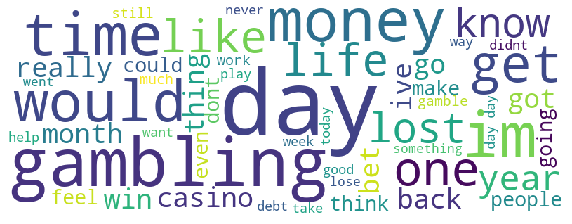

In [80]:
# Generating a word cloud 

stopwords_eng = stopwords.words("english")
text = " "
  
# iterate through the lemmatised post text column of the combined dataframe
for x in combined_df["posts_tokenised_stopped_lem"]: 
          
    for words in x: 
        text = text + words + " "
  
words_wc = WordCloud(max_words= 50,
                      width = 795, # standard image_size for website: https://www.jimdo.com/blog/optimize-website-images-for-better-design-seo/
                      height = 300,
                      background_color ="white",
                      stopwords=stopwords_eng, 
                      contour_width=3, 
                      contour_color="green",
                      min_font_size = 10).generate(text) 
  
# Returning a wordcloud                        
plt.figure(figsize = (10, 10)) 
plt.imshow(words_wc) 
plt.axis("off")
plt.savefig("./images/wordcloud.png")

#### 4.4.2 Visualising Word Count: Barh Plot <a id="4.4.2"></a>

In [81]:
# Defining a Function to get me the counts of words (after they are stopped and lemmed)

def word_count(string):
    counts = {}
    words = string.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [82]:
# Getting total number of words into a dataframe, using "text" variable 
# from the wordcloud cell which contains a string of words NOT a list 

wordcount_df = pd.DataFrame(word_count(text),index=['word_count']).T.sort_values(by='word_count',ascending=False).reset_index()
wordcount_df = wordcount_df.rename(index=str,columns={'index':'word'})

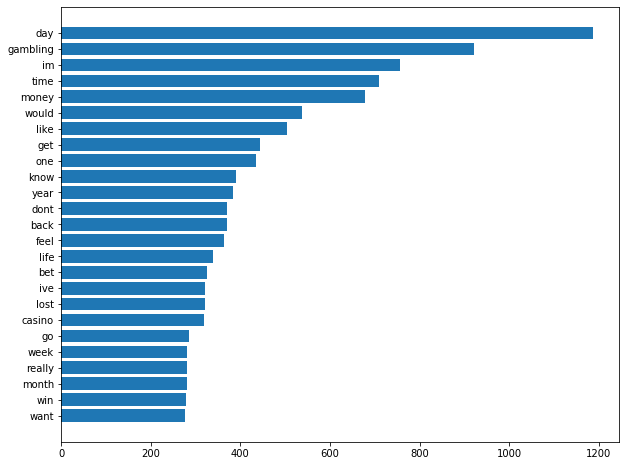

In [83]:
# Plotting Barh ONLY for top 25 words

plt.figure(figsize=(10,8))

plt.barh(y=wordcount_df['word'].head(25)[::-1],
         width=wordcount_df['word_count'].head(25)[::-1])

plt.savefig('./images/wordcount.png')

In [84]:
combined_df.to_csv('./datasets/combined_df.csv')

<br> [Back to Content Page](#top)

# 5. Preprocessing and Modelling <a id="5"></a>

In [85]:
combined_df = pd.read_csv('./datasets/combined_df.csv')

In [86]:
combined_df

,Unnamed: 0,subreddit,posts,posts_tokenised,posts_tokenised_stopped,posts_tokenised_stopped_lem
0,0,1,"Weekly Community Support Thread: Monday, Febru...","['weekly', 'community', 'support', 'thread', '...","['weekly', 'community', 'support', 'thread', '...","['weekly', 'community', 'support', 'thread', '..."
1,1,1,"Even if this sounds ridiculous, i just want to...","['even', 'if', 'this', 'sounds', 'ridiculous',...","['even', 'sounds', 'ridiculous', 'want', 'say'...","['even', 'sound', 'ridiculous', 'want', 'say',..."
2,2,1,Please Help Me - I don't know how to fix my li...,"['please', 'help', 'me', 'i', 'dont', 'know', ...","['please', 'help', 'dont', 'know', 'fix', 'lif...","['please', 'help', 'dont', 'know', 'fix', 'lif..."
3,3,1,"Day 12Spending more time with my family , read...","['day', '12spending', 'more', 'time', 'with', ...","['day', '12spending', 'time', 'family', 'readi...","['day', '12spending', 'time', 'family', 'readi..."
4,4,1,How to stay positive and motivated when not ga...,"['how', 'to', 'stay', 'positive', 'and', 'moti...","['stay', 'positive', 'motivated', 'gamblingi',...","['stay', 'positive', 'motivated', 'gamblingi',..."
...,...,...,...,...,...,...
1390,1390,0,14th birthday cake,"['14th', 'birthday', 'cake']","['14th', 'birthday', 'cake']","['14th', 'birthday', 'cake']"
1391,1391,0,Heavy horse favorites to showI was listening t...,"['heavy', 'horse', 'favorites', 'to', 'showi',...","['heavy', 'horse', 'favorites', 'showi', 'list...","['heavy', 'horse', 'favorite', 'showi', 'liste..."
1392,1392,0,Another parlay,"['another', 'parlay']","['another', 'parlay']","['another', 'parlay']"
1393,1393,0,Taruhan Slot Online Terpercaya,"['taruhan', 'slot', 'online', 'terpercaya']","['taruhan', 'slot', 'online', 'terpercaya']","['taruhan', 'slot', 'online', 'terpercaya']"


In [87]:
# Just checking the dataframe again

preview(combined_df)

_ has shape: (1395, 6).


These are the top 5 rows of _:


,Unnamed: 0,subreddit,posts,posts_tokenised,posts_tokenised_stopped,posts_tokenised_stopped_lem
0,0,1,"Weekly Community Support Thread: Monday, Febru...","['weekly', 'community', 'support', 'thread', '...","['weekly', 'community', 'support', 'thread', '...","['weekly', 'community', 'support', 'thread', '..."
1,1,1,"Even if this sounds ridiculous, i just want to...","['even', 'if', 'this', 'sounds', 'ridiculous',...","['even', 'sounds', 'ridiculous', 'want', 'say'...","['even', 'sound', 'ridiculous', 'want', 'say',..."
2,2,1,Please Help Me - I don't know how to fix my li...,"['please', 'help', 'me', 'i', 'dont', 'know', ...","['please', 'help', 'dont', 'know', 'fix', 'lif...","['please', 'help', 'dont', 'know', 'fix', 'lif..."
3,3,1,"Day 12Spending more time with my family , read...","['day', '12spending', 'more', 'time', 'with', ...","['day', '12spending', 'time', 'family', 'readi...","['day', '12spending', 'time', 'family', 'readi..."
4,4,1,How to stay positive and motivated when not ga...,"['how', 'to', 'stay', 'positive', 'and', 'moti...","['stay', 'positive', 'motivated', 'gamblingi',...","['stay', 'positive', 'motivated', 'gamblingi',..."




These are the bottom 5 rows of _:


,Unnamed: 0,subreddit,posts,posts_tokenised,posts_tokenised_stopped,posts_tokenised_stopped_lem
1390,1390,0,14th birthday cake,"['14th', 'birthday', 'cake']","['14th', 'birthday', 'cake']","['14th', 'birthday', 'cake']"
1391,1391,0,Heavy horse favorites to showI was listening t...,"['heavy', 'horse', 'favorites', 'to', 'showi',...","['heavy', 'horse', 'favorites', 'showi', 'list...","['heavy', 'horse', 'favorite', 'showi', 'liste..."
1392,1392,0,Another parlay,"['another', 'parlay']","['another', 'parlay']","['another', 'parlay']"
1393,1393,0,Taruhan Slot Online Terpercaya,"['taruhan', 'slot', 'online', 'terpercaya']","['taruhan', 'slot', 'online', 'terpercaya']","['taruhan', 'slot', 'online', 'terpercaya']"
1394,1394,0,"Are casino dealers meant to confuse youHi, all...","['are', 'casino', 'dealers', 'meant', 'to', 'c...","['casino', 'dealers', 'meant', 'confuse', 'you...","['casino', 'dealer', 'meant', 'confuse', 'youh..."




_ does not contain nulls


## 5.1 Preprocessing: Train-Test Split <a id="5.1"></a>

In [88]:
# Specifying X and y
X = combined_df["posts_tokenised_stopped_lem"]
y = combined_df["subreddit"]

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## 5.2 Modelling: Multinomial Naive Bayes <a id="5.2"></a>

In [89]:
baseline_score = y_test.value_counts(normalize=True)
baseline_score

1    0.670487
0    0.329513
Name: subreddit, dtype: float64

##### <font color = blue> Shaun: </font>

Storing baseline score in a ~~dataframe~~ series, to append into a summary table later at [5.4.3.2](#5.4.3.2). 

EDIT: Initially I stored it in a dataframe, but had problems joining, so I found out that a series worked instead. Not sure why but hey pragmatism. 

In [90]:
baseline_score_series = pd.Series(data=[baseline_score[1], 
                                        "NaN", 
                                        "NaN", 
                                        "NaN"],
                                  
                                  index=["Accuracy", 
                                         "NaN", 
                                         "NaN", 
                                         "NaN"],
                                  
                                  name="Baseline")

baseline_score_series

Accuracy    0.670487
NaN              NaN
NaN              NaN
NaN              NaN
Name: Baseline, dtype: object

### 5.2.1 Creating a Pipeline: MultinomialNB <a id="5.2.1"></a>

In [91]:
# Creating pipeline for NB
nb = Pipeline([("tvec",TfidfVectorizer()), 
               ("multi_nb", MultinomialNB())
              ]) 

In [92]:
nb.fit(X_train, y_train)

nb_ypred = nb.predict(X_test) 

# Accuracy Score
nb_accuracy = accuracy_score(y_test, nb_ypred)
nb_accuracy

# ROC Score
nb_roc_score = roc_auc_score(y_test, nb_ypred)

### 5.2.2 Classification Metrics: MultinomialNB <a id="5.2.1"></a>

In [93]:
cm_nb = confusion_matrix(y_test, nb_ypred)
tn_nb, fp_nb, fn_nb, tp_nb = cm_nb.ravel()

nb_sensitivity = tp_nb/(tp_nb+fn_nb)
nb_specificity = tn_nb/(tn_nb+fp_nb)

print("The Accuracy Score for", color.BOLD + "MultinomialNB" + color.END, f"is {nb_accuracy}")
print("The Sensitivity Score for", color.BOLD + "MultinomialNB" + color.END, f"is {nb_sensitivity}")
print("The Specificity Score for", color.BOLD + "MultinomialNB" + color.END, f"is {nb_specificity}")
print("The ROC AUC Score for", color.BOLD + "MultinomialNB" + color.END, f"is {nb_roc_score}")

The Accuracy Score for MultinomialNB is 0.7392550143266475
The Sensitivity Score for MultinomialNB is 1.0
The Specificity Score for MultinomialNB is 0.20869565217391303
The ROC AUC Score for MultinomialNB is 0.6043478260869566


In [94]:
# Creating DF to store classification metrics

metrics_df = pd.DataFrame(data=[nb_accuracy, 
                                nb_sensitivity, 
                                nb_specificity, 
                                nb_roc_score],
                          
                          index=["Accuracy", 
                                 "Sensitivity (TPR)", 
                                 "Specificity (TNR)", 
                                 "ROC AUC Score"], 
                          
                           columns=["MultinomialNB"])

metrics_df

,MultinomialNB
Accuracy,0.739255
Sensitivity (TPR),1.000000
Specificity (TNR),0.208696
ROC AUC Score,0.604348


In [95]:
# print(classification_report(y_test, nb_pipeline_ypred, target_names=["problemgambling","gambling"]))

## 5.3 Modelling: Logistic Regression <a id="5.3"></a>

### 5.3.1 Creating a Pipeline: Logistic Regression <a id="5.3.1"></a>

In [96]:
# Creating pipeline for Log Reg
logreg = Pipeline([("tvec", TfidfVectorizer()),
                   ("logreg", LogisticRegression(solver="liblinear", random_state=42))
                  ])


In [97]:
logreg.fit(X_train, y_train)

logreg_ypred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_ypred)

# Accuracy Score
logreg_accuracy

# ROC AUC Score
logreg_roc_score = roc_auc_score(y_test, logreg_ypred)

### 5.3.2 Classification Metrics: Logistic Regression <a id="5.3.2"></a>

In [98]:
cm_logreg = confusion_matrix(y_test, logreg_ypred)
tn_logreg, fp_logreg, fn_logreg, tp_logreg = cm_logreg.ravel()

logreg_sensitivity = tp_logreg/(tp_logreg+fn_logreg)
logreg_specificity = tn_logreg/(tn_logreg+fp_logreg)

print("The Accuracy Score for", color.BOLD + "Logistic Regression" + color.END, f"is {logreg_accuracy}")
print("The Sensitivity Score for", color.BOLD + "Logistic Regression" + color.END, f"is {logreg_sensitivity}")
print("The Specificity Score for", color.BOLD + "Logistic Regression" + color.END, f"is {logreg_specificity}")
print("The ROC AUC Score for", color.BOLD + "Logistic Regression" + color.END, f"is {logreg_roc_score}")

The Accuracy Score for Logistic Regression is 0.9111747851002865
The Sensitivity Score for Logistic Regression is 0.9658119658119658
The Specificity Score for Logistic Regression is 0.8
The ROC AUC Score for Logistic Regression is 0.882905982905983


In [99]:
logreg_metrics_df = pd.DataFrame(data=[logreg_accuracy, 
                                       logreg_sensitivity, 
                                       logreg_specificity, 
                                       logreg_roc_score],
                          
                                 index=["Accuracy", 
                                        "Sensitivity (TPR)", 
                                        "Specificity (TNR)", 
                                        "ROC AUC Score"], 
                          
                                 columns=["Logistic Regression"])

metrics_df = metrics_df.join(logreg_metrics_df)
metrics_df

,MultinomialNB,Logistic Regression
Accuracy,0.739255,0.911175
Sensitivity (TPR),1.000000,0.965812
Specificity (TNR),0.208696,0.800000
ROC AUC Score,0.604348,0.882906


In [100]:
# Found this cool thing that seems to generate the accuracy, sensitivity, and specificity, but idk how to interpret. 
# My guess it is something similar, since the parameters look similar to the confusion matrix parameters
# If you have time, can take a look and run it and see if make sense to you haha.

# print(classification_report(y_test, logreg_ypred, target_names=["problemgambling","gambling"]))

## 5.4 Model Optimisation <a id="5.4"></a>

### 5.4.1 Optimisation Parameters for GridSearchCV <a id="5.4.1"></a>

In [101]:
# Just listing them out here first before I throw them into GridSearchCV one at a time

# Parameters to try for NB
nb_param_grid = [{"tvec__max_features": [200, 300],
                  "tvec__ngram_range":[(1,1),(1,2)],
                  "tvec__max_df":[0.9,0.95],
                  "tvec__min_df":[0.0001,0.001,0.01]
                 }]

# Parameters to try for logreg
logreg_param_grid = [{"tvec__max_features": [50, 250, 500],
                      "tvec__ngram_range": [(1,1),(1,2)],
                      "tvec__max_df":[0.9,0.95],
                      "tvec__min_df":[0.0001,0.001,0.01],                        
                      "logreg__C":np.linspace(0.1,1,3),
                     }]

### 5.4.2 Optimised MultinomialNB <a id="5.4.2"></a>

#### 5.4.2.1 Optimised MultinomialNB: Modelling <a id="5.4.2.1"></a>

In [102]:
# Creating an optimised MultinomialNB using GridSearchCV to get best parameters

nb_optimised = GridSearchCV(estimator = nb,
                            param_grid = nb_param_grid,
                            scoring = "accuracy"
                           )

In [103]:
nb_optimised.fit(X_train, y_train)

# Best score possible, with above param_grid
nb_optimised_accuracy = nb_optimised.best_score_

# Best parameters that returned that score
nb_optimised_best_params = nb_optimised.best_params_

# Predicting Y using X_text (for confusion matrix later)
nb_optimised_ypred = nb_optimised.predict(X_test)

# ROC AUC Score
nb_optimised_roc_score = roc_auc_score(y_test, nb_optimised_ypred)

display(nb_optimised_best_params)
display(nb_optimised_ypred)

{'tvec__max_df': 0.9,
 'tvec__max_features': 300,
 'tvec__min_df': 0.0001,
 'tvec__ngram_range': (1, 1)}

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,

#### 5.4.2.2 Optimised MultinomialNB: Classification Metrics <a id="5.4.2.2"></a>

In [104]:
cm_nb_optimised = confusion_matrix(y_test, nb_optimised_ypred)
tn_nb_optimised, fp_nb_optimised, fn_nb_optimised, tp_nb_optimised = cm_nb_optimised.ravel()

nb_optimised_sensitivity = tp_nb_optimised/(tp_nb_optimised+fn_nb_optimised)
nb_optimised_specificity = tn_nb_optimised/(tn_nb_optimised+fp_nb_optimised)

print("The Accuracy Score for the", color.BOLD + "Optimised MultinomialNB" + color.END, f"is {nb_optimised_accuracy}")
print("The Sensitivity Score for the", color.BOLD + "Optimised MultinomialNB" + color.END, f"is {nb_optimised_sensitivity}")
print("The Specificity Score for the", color.BOLD + "Optimised MultinomialNB" + color.END, f"is {nb_optimised_specificity}")
print("The ROC AUC Score for the", color.BOLD + "Optimised MultinomialNB" + color.END, f"is {nb_optimised_roc_score}")

The Accuracy Score for the Optimised MultinomialNB is 0.8604420141262246
The Sensitivity Score for the Optimised MultinomialNB is 0.9743589743589743
The Specificity Score for the Optimised MultinomialNB is 0.6347826086956522
The ROC AUC Score for the Optimised MultinomialNB is 0.8045707915273133


In [105]:
optimised_nb_metrics_df = pd.DataFrame(data=[nb_optimised_accuracy, 
                                       nb_optimised_sensitivity, 
                                       nb_optimised_specificity, 
                                       nb_optimised_roc_score],
                          
                                 index=["Accuracy", 
                                        "Sensitivity (TPR)", 
                                        "Specificity (TNR)", 
                                        "ROC AUC Score"], 
                          
                                 columns=["Optimised MultinomialNB"])

metrics_df = metrics_df.join(optimised_nb_metrics_df)
metrics_df

,MultinomialNB,Logistic Regression,Optimised MultinomialNB
Accuracy,0.739255,0.911175,0.860442
Sensitivity (TPR),1.000000,0.965812,0.974359
Specificity (TNR),0.208696,0.800000,0.634783
ROC AUC Score,0.604348,0.882906,0.804571


### 5.4.3 Optimised Logistic Regression <a id="5.4.3"></a>

#### 5.4.3.1 Optimised Logistic Regression: Modelling <a id="5.4.3.1"></a>

In [106]:
logreg_optimised = GridSearchCV(estimator = logreg,
                                param_grid = logreg_param_grid,
                                scoring = "accuracy"
                               )

In [107]:
logreg_optimised.fit(X_train, y_train)

# Best accuracy score possible, with above param_grid
logreg_optimised_accuracy = logreg_optimised.best_score_

# Best parameters that returned that score
logreg_optimised_best_params = logreg_optimised.best_params_

# Predicting Y using X_text (for confusion matrix later)
logreg_optimised_ypred = logreg_optimised.predict(X_test)

# ROC AUC Score
logreg_optimised_roc_score = roc_auc_score(y_test, logreg_optimised_ypred)

display(logreg_optimised_best_params)
display(logreg_optimised_ypred)

{'logreg__C': 1.0,
 'tvec__max_df': 0.9,
 'tvec__max_features': 500,
 'tvec__min_df': 0.0001,
 'tvec__ngram_range': (1, 2)}

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,

#### 5.4.3.2 Optimised Logistic Regression: Classification Metrics <a id="5.4.3.2"></a>

In [108]:
cm_logreg_optimised = confusion_matrix(y_test, logreg_optimised_ypred)
tn_logreg_optimised, fp_logreg_optimised, fn_logreg_optimised, tp_logreg_optimised = cm_logreg_optimised.ravel()

logreg_optimised_sensitivity = tp_logreg_optimised/(tp_logreg_optimised+fn_logreg_optimised)
logreg_optimised_specificity = tn_logreg_optimised/(tn_logreg_optimised+fp_logreg_optimised)

print("The Accuracy Score for the", color.BOLD + "Optimised Logistic Regression" + color.END, f"is {logreg_optimised_accuracy}")
print("The Sensitivity Score for the", color.BOLD + "Optimised Logistic Regression" + color.END, f"is {logreg_optimised_sensitivity}")
print("The Specificity Score for the", color.BOLD + "Optimised Logistic Regression" + color.END, f"is {logreg_optimised_specificity}")
print("The ROC AUC Score for the", color.BOLD + "Optimised Logistic Regression" + color.END, f"is {logreg_optimised_roc_score}")

The Accuracy Score for the Optimised Logistic Regression is 0.9197038049669628
The Sensitivity Score for the Optimised Logistic Regression is 0.9401709401709402
The Specificity Score for the Optimised Logistic Regression is 0.8347826086956521
The ROC AUC Score for the Optimised Logistic Regression is 0.8874767744332962


In [109]:
optimised_logreg_metrics_df = pd.DataFrame(data=[logreg_optimised_accuracy, 
                                       logreg_optimised_sensitivity, 
                                       logreg_optimised_specificity, 
                                       logreg_optimised_roc_score],
                          
                                 index=["Accuracy", 
                                        "Sensitivity (TPR)", 
                                        "Specificity (TNR)", 
                                        "ROC AUC Score"], 
                          
                                 columns=["Optimised Logistic Regression"])

metrics_df = metrics_df.join(optimised_logreg_metrics_df)
metrics_df

,MultinomialNB,Logistic Regression,Optimised MultinomialNB,Optimised Logistic Regression
Accuracy,0.739255,0.911175,0.860442,0.919704
Sensitivity (TPR),1.000000,0.965812,0.974359,0.940171
Specificity (TNR),0.208696,0.800000,0.634783,0.834783
ROC AUC Score,0.604348,0.882906,0.804571,0.887477


##### <font color = blue> Shaun: </font>

Joining `baseline_score_series` which I created at [5.2](#5.2), to `metrics_df` 


In [110]:
metrics_df = metrics_df.join(baseline_score_series)
metrics_df

,MultinomialNB,Logistic Regression,Optimised MultinomialNB,Optimised Logistic Regression,Baseline
Accuracy,0.739255,0.911175,0.860442,0.919704,0.670487
ROC AUC Score,0.604348,0.882906,0.804571,0.887477,NaN
Sensitivity (TPR),1.000000,0.965812,0.974359,0.940171,NaN
Specificity (TNR),0.208696,0.800000,0.634783,0.834783,NaN


## 5.5 Summary of Classification Metrics <a id="5.5"></a>

In [111]:
# Transposing cos it looks nicer to me
metrics_df = metrics_df.T

# Cool function to bold text in DF
metrics_df.style.apply(lambda x: ["font-weight:bold" if x.name in ["Optimised Logistic Regression"] 
                                  else "" for i in x], axis=1)

# Can't seem to flush the model names to the left

,Accuracy,ROC AUC Score,Sensitivity (TPR),Specificity (TNR)
MultinomialNB,0.739255,0.604348,1.000000,0.208696
Logistic Regression,0.911175,0.882906,0.965812,0.800000
Optimised MultinomialNB,0.860442,0.804571,0.974359,0.634783
Optimised Logistic Regression,0.919704,0.887477,0.940171,0.834783
Baseline,0.670487,nan,nan,nan


In [112]:
# Tried to save as a table by following this link, but the output doesn't seem nice but keeping it here for reference: 
# https://stackoverflow.com/questions/35634238/how-to-save-a-pandas-dataframe-table-as-a-png

# ax = plt.subplot(frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis

# table(ax, metrics_df)  # where df is your data frame

# plt.savefig('mytable.png')

##### <font color = blue> Shaun: </font>

It would appear that the Optimised MultinomialNB gives the highest Sensitivity or True Positive Rate. At first in the [problem statement](#here), I had mentioned that I would likely be going with the model yielding the highest Sensitivity/TPR. 

However, it seems that the greater TPR of the Optimised MultinomialNB comes at a hefty cost of Specificity. 

While I may be able to catch more people who actually are headed towards problem gambling or are already facing problem gambling, I identify **disproportionately fewer** individuals who are not headed towards problem gambling nor are facing problem gambling.

Therefore, I feel it may still be wise to head with the **Optimised Logistic Regression** model. Also, it has a higher ROC AUC Score, indicating that the model does a very good job distinguishing between r/problemgambling and r/gambling. In fact, it does the best job in this regard when compared to the other models.

## 5.6 Fitting the Model <a id="5.6"></a>

In [113]:
# Getting best params for optimised Logistic Regression as found above

logreg_optimised_best_params

{'logreg__C': 1.0,
 'tvec__max_df': 0.9,
 'tvec__max_features': 500,
 'tvec__min_df': 0.0001,
 'tvec__ngram_range': (1, 2)}

In [114]:
# Pipeline for finalised model

finalised_logreg = Pipeline([
    ("tvec",TfidfVectorizer(max_df=0.9, max_features=500, min_df=0.0001,ngram_range=(1,1))),
    ("logreg",LogisticRegression())])

In [115]:
# Fitting final model

finalised_logreg.fit(X, y)

Pipeline(memory=None,
         steps=[('tvec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=500,
                                 min_df=0.0001, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_s

## 5.7 Feature Words and Coefficients <a id="5.7"></a>

### 5.7.1 Feature Words <a id="5.7.1"></a>

In [116]:
# Learnt that we can call out something from pipelin to use .get_feature_names()

# getting features words from tfidf
feature_words = finalised_logreg["tvec"].get_feature_names()

feature_words

['10',
 '100',
 '1000',
 '12',
 '15',
 '16',
 '18',
 '20',
 '200',
 '2019',
 '21',
 '25',
 '2nd',
 '30',
 '40',
 '400',
 '50',
 '500',
 'able',
 'absolutely',
 'access',
 'account',
 'action',
 'active',
 'actually',
 'addiction',
 'advice',
 'ago',
 'almost',
 'alone',
 'already',
 'also',
 'always',
 'amount',
 'amp',
 'ampx200b',
 'another',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'april',
 'around',
 'ask',
 'asked',
 'asking',
 'away',
 'back',
 'bad',
 'bank',
 'become',
 'believe',
 'best',
 'bet',
 'better',
 'betting',
 'big',
 'bill',
 'bit',
 'bitcoin',
 'blackjack',
 'bonus',
 'book',
 'bookie',
 'brain',
 'break',
 'broke',
 'business',
 'buy',
 'call',
 'called',
 'came',
 'cannot',
 'cant',
 'car',
 'card',
 'care',
 'cash',
 'casino',
 'cause',
 'chance',
 'change',
 'chase',
 'chasing',
 'check',
 'clean',
 'close',
 'come',
 'coming',
 'community',
 'completely',
 'compulsive',
 'control',
 'could',
 'couldnt',
 'couple',
 'course',
 'crap',
 'crazy',
 'credit

### 5.7.2 Coefficients <a id="5.5.2"></a>

In [117]:
# Creating a DF to store coefficients

coefs = [i for j in finalised_logreg["logreg"].coef_ for i in j]
word_coefs = pd.DataFrame([coefs,np.abs(coefs)], columns=feature_words, index=['coef','coef_abs']).transpose()

word_coefs

,coef,coef_abs
10,0.279867,0.279867
100,-0.136585,0.136585
1000,-0.191535,0.191535
12,0.471406,0.471406
15,-0.230470,0.230470
...,...,...
year,1.035871,1.035871
yesterday,0.500831,0.500831
yet,0.248573,0.248573
young,0.027427,0.027427


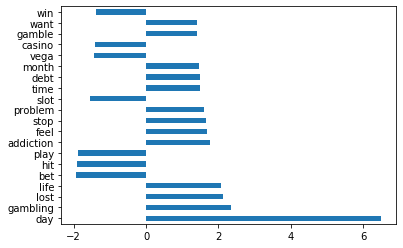

In [118]:
# Looking at the top 20 words that appear the most
# Note: SORTING by coef_abs but DISPLAYING coefs

word_coefs.sort_values("coef_abs", ascending=False).coef[:20].plot(kind="barh")

##### <font color = blue> Shaun: </font>

This visual representation of the top 20 words with the highest absolute coefficient might be something that will prove insightful.

It is apparent that certain words are likely to be used in the context of `problemgambling`, such as `day` and `gambling`. In stark contrast, the opposite seems true as well - there are certain words that are likely to be used in the context of`gambling`. 

I will share more on how I think this can be applied at the [Conclusions and Recommendations](#6) section.


## 5.8 The ROC Curve <a id="5.8"></a>

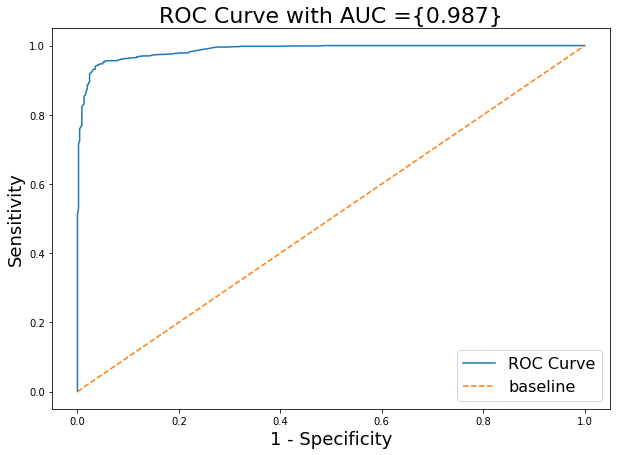

In [119]:
#codes supplied from ROC lecture
# creating dataframe true value and predicted probabilities
pred_proba = [i[1] for i in finalised_logreg.predict_proba(X)]

pred_df = pd.DataFrame({'true_values': y,
                        'pred_probs':pred_proba})
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC =' + str({round((roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])),3)}), fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

##### <font color = blue> Shaun: </font>
<br>
<img src="./images/dsi_13_sg_shaun_project_3_dontknowwhattofeel.jpg" width="200" height="80" align="left"/>



I don't know whether this is a good or a bad thing. 

On one hand, we are trying to maximise the ROC AUC. On the otherhand, this could mean that our dataset was fundamentally too different to begin with, even though **both lexical and logical** reasons led us to think otherwise.

We did read through some posts, and we also thought that gambling and problem gambling would be similar.

Or it could mean that the model is really good. Eitherway, I think it is a good sign that the score is so high.

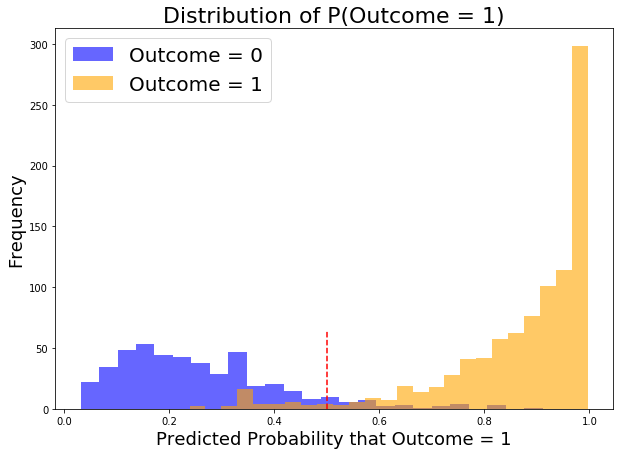

In [120]:
# This is something like a visual representation of the confusion matrix ...

# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x=0.5,
           ymin = 0,
           ymax = 65,
           color='r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

##### <font color = blue> Shaun: </font>

This to me is a visual representation of the confusion matrix. 

So we can see here that the majority of posts have been correctly classified as positive(TP) and negative(TN). 

As a reminder, positive is `problemgambling` while negative is `gambling`.

Notwithstanding a handful of posts:
<br> 1) FN: Yellow bars crossing the red line indicates `problemgambling` wrongly classified as `gambling`
<br> 2) FP: Blue bars crossing the red line indicates `gambling` wrongly classified as `problemgambling` 

<br> [Back to Content Page](#top)

# 6. Conclusion and Recommendations <a id="6"></a>

Our [problem statement](#1) addressed the prevalent issue of problem gambling in Singapore, and outlined the potential utility of using NLP to train a model that attempts to classify posts from the two chosen subreddits: 
<br> (1) <a href="https://www.reddit.com/r/problemgambling/">**r/problemgambling**</a> 
<br> (2) <a href="https://www.reddit.com/r/gambling/">**r/gambling**</a>

To recap, the main body addressing this issue in Singapore is the **National Council on Problem Gambling (NCPG)**.

### The Model
We managed to produce an **Optimised Logistic Regression** model that will correctly classify posts from `r/problemgambling` approximately 94% of the time. This same model achieved an **ROC AUC Score** of 0.898, significantly higher than our **[baseline score](#5.2)** of 0.670. In fact, the score ROC AUC Score of 0.898 was the highest ROC AUC score among all models. 

### Feature Words
As determined [earlier](#5.5.2), certain words appeared to be suggestive of the subreddit it likely originated from. By extension, posts containing such words were also suggestive of the subreddit it originated from. 

In the evaluation of the model, words like `debt`, `addiction`, and `lost`, often led it to classify a post as one originating from **r/problemgambling**. 

In contrast, words like `casino`, `play`, and `bet`, often led the model to classify a post as one originating from **r/gambling**.

### Basis of Recommendations
We believe that our model is able to classify posts correctly to a large extent (ROC Score: 0.898, TPR: 94%), based on feature words (some more so than others). Therefore, we can **use these features words as a basis upon which to provide recommendations** to two distinct audiences.

### <font color = green> Primary Audience Recommendations: NCPG Management </font>
Recommendations for the NCPG can be split broadly into two categories: 
<br> (1) Early Intervention 
<br> (2) Post Intervention

#### Early Intervention
Feature words can be used by NCPG personnel to identify individuals who are at risk of developing debilitative gambling habits. 

Feature words can be incorporated into a variety of exisiting or potential means as a form of problem gambling identification. These methods may include but are not limited to:
<br> **1) Consultations**
<br> **2) Surveys**

For example, NCPG counsellors may **pay special attention** to certain feature words identified by our model, since some of these feature words have helped our model to correctly classify a post originating from r/problemgambling. In context, NCPG counsellors may use these feature words to help assess if an individual is indeed heading towards problem gambling, or is currently facing problem gambling. 

Appropriate follow up action can then be considered, but this is **beyond the scope of our project**.

#### Post Intervention
The underlying principle remains the same for post-intervention recommendations - capitalise on feature words to identify whether an individual is recovering from or regressing to problem gambling. 

Likewise, this can be done in a variety of ways, most of which already exist within the NCPG. The findings of our project, feature words in particular, serve to enhance the efficiency and effectiveness of any existing or pre-existing initiatives.  
### <font color = green> Secondary Audience Recommendations: NCPG Data Science Team </font>
The findings of our project may assist the current data science team at the NCPG by providing a set of feature words, which may then be utilised to propel any current endeavours.

Further, the team will have access to our model, which they can choose to utilise.

Perhaps another pertinent application for the NCPG team is in fact the limitations of our project, which forms a basis upon which the team may establish a new project direction. 

We will now address the limitations of this project. 

<br> [Back to Content Page](#top)

# 7. Limitations <a id="7"></a>

### <font color = red> Generalisability: Context </font> 
At the crux of our project lies the assumption that posts from Reddit will generalise to the Singaporean context. In reality, this can be no further from the truth. 

As of 2019 October, <a href="https://www.statista.com/statistics/325144/reddit-global-active-user-distribution/">about half</a> of visitors to Reddit are American, which suggests that posts will more likely reflect the American context instead of the Singaporean context. 

### <font color = red> Generalisability: Gender </font> 
<a href="https://mediakix.com/blog/reddit-statistics-users-demographics/">About 70%</a> of Redditors are male, which hints that the actual female experience may not be reflected sufficiently by posts on Reddit. We assumed that the majority of problem gamlers are male.

<br> [Back to Content Page](#top)

# 8. Future Directions <a id="8"></a>

### <font color = green> Areas for Study </font>
Our projected looked at scrapped Reddit posts from two subreddits, r/problemgambling and r/gambling. We then used NLP to process these posts in order to train a model to classify them correctly. Ultimately, we wanted to be able to create a model to help identify individuals heading towards or who are currently experiencing problem gambling.

One possible area of interest that awaits further study is the a potential follow-up to our project. While we aimed to identify current/potential problem gamblers, future studies can target recovering problem gamblers. In particular, investigating recovering and regressing problem gamblers. 

### <font color = green> Generalisability: Context </font>
To address the issue of generalisability to the Singaporean context, we recommend considering Singaporean oriented forums such as HardwareZone.

### <font color = green> Generalisability: Gender </font>
On hindsight, there may not be a great impact of this assumption for the Singaporean context. It could be the case that the majority of problem gamblers are indeed male. However, it may be worth checking whether this is indeed the case by searching the records of the NPCG. 

This is beyond the scope of our project.

[Back to Content Page](#top)

In [121]:
# Total run time

print(f"Run complete, total time taken \u2248 {time.time()-t0:.2f}s")

Run complete, total time taken ≈ 95.59s
